In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

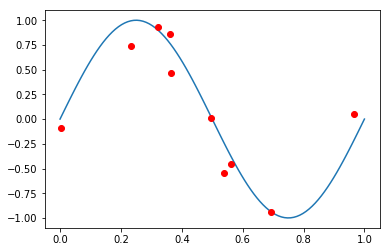

In [17]:
#Generación de observaciones aleatorias a partir de la función seno
np.random.seed(257915)
pi= np.pi
x = np.linspace(0,1,100) 
y = np.sin(2*pi*x)
plt.plot(x,y, label=r'$f(x)=\sin(x)$')


x1=np.sort(np.random.rand(10))
y1=np.sin(2*pi*x1)


noise = np.random.uniform(-0.3, 0.3, x1.shape)
ys= y1 + noise   # start,stop,step

plt.plot(x1,ys,'ro')


# Polinomial Curve Fitting

Se ajustarán los datos usando una función polinomial de la forma:

$$y(x,\boldsymbol{w}) = w_0 + w_1x + w_2x^2+ . . . + w_M x^M = \sum_{j=0}^M w_jx^j$$

Donde M es el orden del polinomio y $w=[w_0,\cdots,w_M]$ son los coeficientes del polinomio.

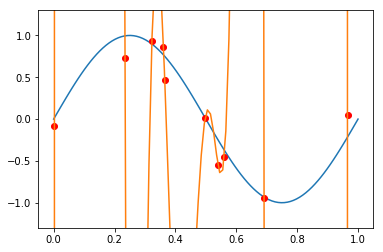

In [4]:
poly0 = np.poly1d(np.polyfit(x1,ys,9))
xp = np.linspace(0, 1, 100)

plt.plot(x,y)
plt.plot(x1,ys,'ro')
plt.ylim(-1.3,1.3)
plt.plot(xp,poly0(xp))
plt.show()

Text(0.5, 0.98, 'Polynomial Curve Fitting')

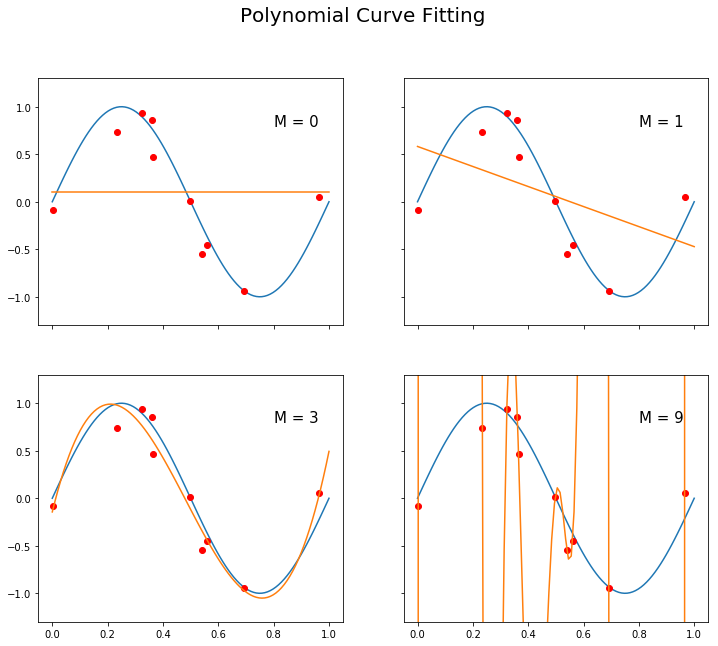

In [5]:
fig, ax = plt.subplots( 2, 2 ,sharex = True, sharey = True, figsize=(12,10))

poly00 = np.poly1d(np.polyfit(x1,ys,0))
ax[0,0].plot(x,y)
ax[0,0].plot(x1,ys,"ro")
ax[0,0].set_ylim(-1.3,1.3)                 
ax[0,0].plot(xp,poly00(xp))
ax[0,0].text(0.8,0.8,"M = 0",fontsize=15)

poly01 = np.poly1d(np.polyfit(x1,ys,1))
ax[0,1].plot(x,y)
ax[0,1].plot(x1,ys,"ro")
ax[0,1].set_ylim(-1.3,1.3)   
ax[0,1].plot(xp,poly01(xp))
ax[0,1].text(0.8,0.8,"M = 1",fontsize=15)
                   
poly10 = np.poly1d(np.polyfit(x1,ys,3))
ax[1,0].plot(x,y)
ax[1,0].plot(x1,ys,"ro")
ax[1,0].set_ylim(-1.3,1.3)    
ax[1,0].plot(xp,poly10(xp))
ax[1,0].text(0.8,0.8,"M = 3",fontsize=15)

poly11 = np.poly1d(np.polyfit(x1,ys,9))
ax[1,1].plot(x,y)
ax[1,1].plot(x1,ys,"ro")
ax[1,1].set_ylim(-1.3,1.3) 
ax[1,1].plot(xp,poly11(xp))
ax[1,1].text(0.8,0.8,"M = 9",fontsize=15)

fig.suptitle("Polynomial Curve Fitting",fontsize=20)


# Determinando los valores w

Los coeficientes del polinomio pueden ser determinados ajustando el polinomio a los datos de entrenamiento. Mediante la minimización de la función de error que mide el desajuste entre la funcion $y(x,w)$ para un valor dado de $w$ y el conjunto de entrenamiento. Tomando la función de error como la sumas de los errores al cuadrado se tiene: 


$$E(w) = \frac{1}{2} \sum_{n=1}^{N} [{y(x_n,\boldsymbol{w}) − t_n}]^2$$


In [6]:
def sse(w) :
    si=0
    
    for i in range(10):
        x=x1[i]
        t=ys[i]
        xi=np.zeros(len(w))
        for j in range(len(w)):
            xi[j]=pow(x,j)
        si= 1/2*pow(np.dot(xi,w)-t,2)+ si
    return si  
        
            
    

Se puede solucionar el problema de ajuste escogiendo el valor w para el cual $E(w)$ sea el menor. Y dado que la función de error es cuadratica en los coeficientes w, su minimización con respecto a estos tiene una solución única $w*$. Asi el polinomio resultante sera $y(x,w*)$

In [84]:
from scipy.optimize import minimize

x0 = np.zeros(4)
res = minimize(sse, x0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': True})


Optimization terminated successfully.
         Current function value: 0.110912
         Iterations: 361
         Function evaluations: 640


In [85]:
print(res.x)

[ -0.1437961   11.8837162  -36.07984737  24.83316545]


En las siguientes lineas se encontrarán los Ws optimos para cada caso (cada grado polinomial) 

In [10]:

W=[]

for i in range(10):
    x0= np.zeros(i+1)
    res = minimize(sse, x0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': False})
    W.append(res.x) 

#Se gurdan los ws en un arreglo de arreglos.
    


In [114]:
df = pd.DataFrame(W,columns=['$w_0$','$w_1$','$w_2$','$w_3$','$w_4$','$w_5$','$w_6$','$w_7$','$w_8$','$w_9$'],index=['M=0','M=1','M=2','M=3','M=4','M=5','M=6','M=7','M=8','M=9'])
df.T

,M=0,M=1,M=2,M=3,M=4,M=5,M=6,M=7,M=8,M=9
$w_0$,0.103194,0.581792,0.528384,-0.143796,-0.140450,-0.126290,-0.048175,-0.131524,0.000672,-0.130369
$w_1$,NaN,-1.054116,-0.755393,11.883716,11.931109,10.463985,3.809970,10.345227,5.334469,8.130263
$w_2$,NaN,NaN,-0.306014,-36.079847,-36.440158,-29.167878,5.529771,-26.868420,-8.050744,-12.073203
$w_3$,NaN,NaN,NaN,24.833165,25.498132,16.125185,-32.634552,7.062228,-5.812129,-20.911566
$w_4$,NaN,NaN,NaN,NaN,-0.357061,-0.647968,-12.342564,9.181948,0.151265,20.294041
$w_5$,NaN,NaN,NaN,NaN,NaN,3.959120,67.152460,10.395984,0.337197,7.923541
$w_6$,NaN,NaN,NaN,NaN,NaN,NaN,-30.798449,-16.397512,7.261505,6.396076
$w_7$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.994782,-5.153339,-4.803195
$w_8$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.146947,10.462162
$w_9$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.357132


In [12]:
def X(x,W) :
    X=np.zeros(len(W))
    for i in range(len(W)) :
        X[i]=pow(x,i)
    return X      

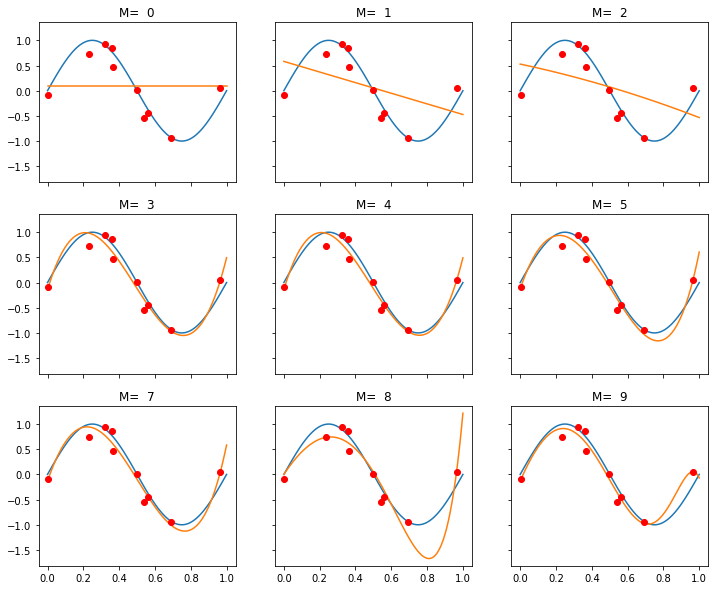

In [21]:
fig, ax = plt.subplots( 3, 3 ,sharex = True, sharey = True, figsize=(12,10))

for k in range(3):
    for j in range(3):  
        n=pow(2,k)+j+2*k-1 #---> para producir la secuencia 012345789
        x11=np.linspace(0,1,100)
        y11=np.zeros(100)
        for i in range(len(y11)):
            y11[i]=np.dot(W[n],X(x11[i],W[n]))
        ax[k,j].plot(x,y)  
        ax[k,j].plot(x11,y11)
        ax[k,j].plot(x1,ys,'ro')
        ax[k,j].set_title("M={:3.0f}".format(n)) #--> titulo de cada subplot    

## Comparing the models: root mean square error

Para comparar los distintos modelos se calculará la raiz del error cuadrtico medio como :

$$E_{RMS} = \sqrt{2E(\boldsymbol{w}^*)/N }$$ 

In [24]:
Erms=np.zeros(10)
for i in range(10):
    x0= np.zeros(i+1)
    res = minimize(sse, x0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': False})
    Erms[i]=math.sqrt(2*sse(res.x)/10)
#print(Erms)    

In [59]:
# nuevas observaciones de x
np.random.seed(1234)
x21=np.sort(np.random.rand(10))
y21=np.sin(2*pi*x1)
noise2 = np.random.normal(0,0.3, x1.shape)
ys2= y21 + noise2   # start,stop,step

#Caluculamos e Erms de los predictores de las nuevas obs.


def sse1(w) :
    si=0
    
    for i in range(10):
        x=x21[i]
        t=ys2[i]
        xi=np.zeros(len(w))
        for j in range(len(w)):
            xi[j]=pow(x,j)
        si= 1/2*pow(np.dot(xi,w)-t,2)+ si
    return si  
        

Erms1=np.zeros(10)
for i in range(10):
    Erms1[i]=math.sqrt(2*sse1(W[i])/10)
    
   

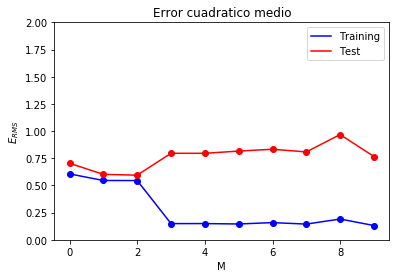

In [60]:
M=np.array([0,1,2,3,4,5,6,7,8,9])


plt.figure()
plt.plot(M,Erms,'b',label='Training')
plt.plot(M,Erms1,'r',label='Test')
plt.plot(M,Erms,'bo')
plt.plot(M,Erms1,'ro')
plt.ylim(0,2)
plt.xlabel('M')
plt.ylabel('$E_{RMS}$')
plt.legend(loc='best')
plt.title('Error cuadratico medio')
plt.show()


## Regularización 

Está tecnica es usada oara controlar el problema de sobreajuste penalizandor el termino de error asi:

$$\widetilde{E}(\boldsymbol{w})  = \frac{1}{2} \sum_{n=1}^{N}[y(x_n,\boldsymbol{w}) − t_n]^2 +  \frac{λ}{2} ||\boldsymbol{w} ||^2$$

In [111]:
l=np.array([0.0000000000000000001, math.exp(-18), 1]) 
Wreg=[]    

for k in range(len(l)):
    
    def rsse(w) :
        si=0
    
        for i in range(10):
            x=x1[i]
            t=ys[i]
            xi=np.zeros(len(w))
            for j in range(len(w)):
                xi[j]=pow(x,j)
            si= 1/2*pow(np.dot(xi,w)-t,2)+ si
        ew= si + l[k]/2*np.dot(w,w) 
        return ew

    x0 = np.zeros(10)
    res1 = minimize(rsse, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': False})
    Wreg.append(res1.x) 


    
    
    

In [112]:
df1=pd.DataFrame(Wreg,columns=['$w_0$','$w_1$','$w_2$','$w_3$','$w_4$','$w_5$','$w_6$','$w_7$','$w_8$','$w_9$'],index=['$\ln(\lambda)=-\infty$','$\ln(\lambda)=-18$','$\ln(\lambda)=0$'])
df1.T


,$\ln(\lambda)=-\infty$,$\ln(\lambda)=-18$,$\ln(\lambda)=0$
$w_0$,-0.130369,-0.130372,0.266460
$w_1$,8.130263,8.137216,-0.216919
$w_2$,-12.073203,-12.147030,-0.314713
$w_3$,-20.911566,-20.651653,-0.173793
$w_4$,20.294041,19.983231,-0.066257
$w_5$,7.923541,7.841304,0.013709
$w_6$,6.396076,6.724003,0.098950
$w_7$,-4.803195,-4.834271,0.056599
$w_8$,10.462162,10.380099,0.105050
$w_9$,-15.357132,-15.373724,0.127513


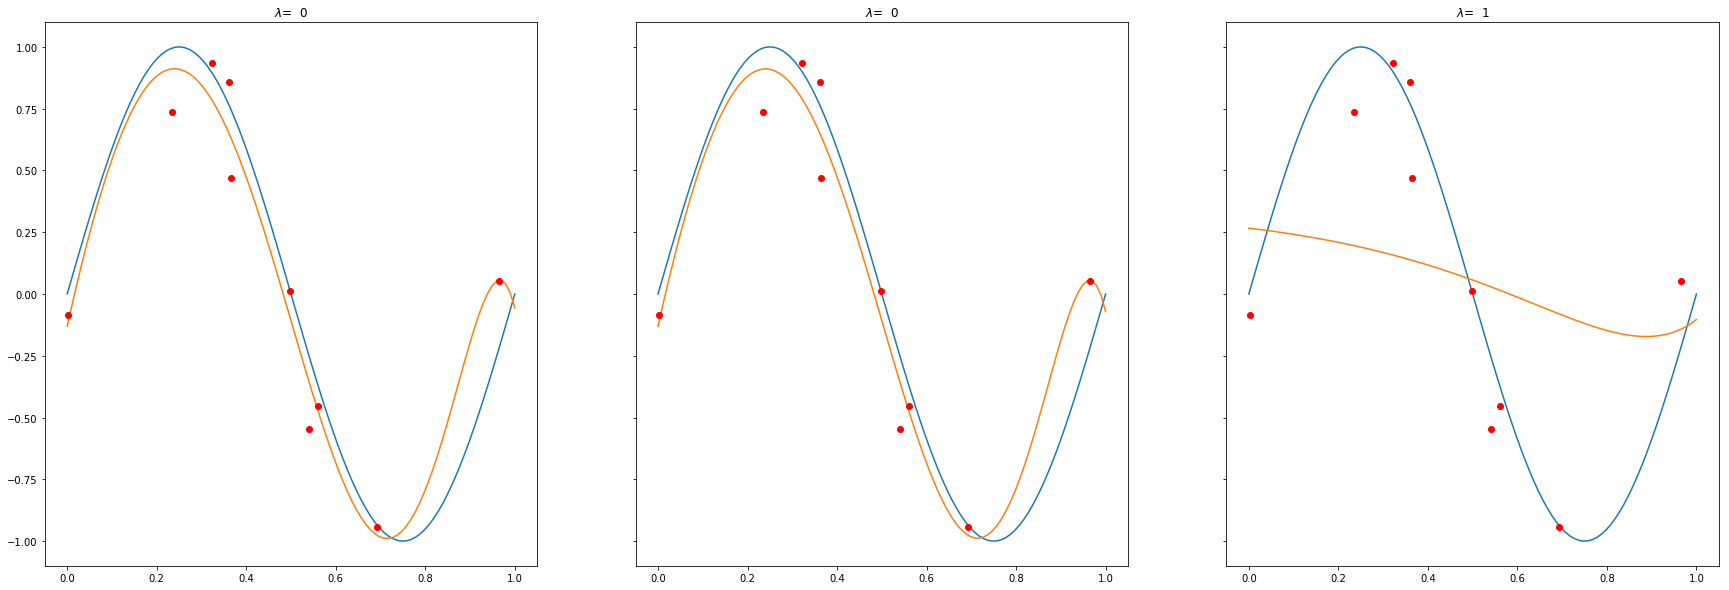

In [103]:
fig, ax = plt.subplots( 1, 3 ,sharex = True, sharey = True, figsize=(30,10))

for j in range(3):
    x11=np.linspace(0,1,100)
    y11=np.zeros(100)
    for i in range(len(y11)):
        y11[i]=np.dot(Wreg[j],X(x11[i],Wreg[j]))
    ax[j].plot(x,y)  
    ax[j].plot(x11,y11)
    ax[j].plot(x1,ys,'ro')
    ax[j].set_title("$\lambda$={:3.0f}".format(l[j])) #--> titulo de cada subplot 

## Máxima Verosimilitud

Se usará los datos de entrenamiento para determinar los valores de los parametros desconocidos $w$ y $\beta$ por maxima verosimilitud. Si asumimos que los datos son tomados de forma independiente de una distribución $ p(t|x,\boldsymbol{w}, β) = \mathcal{N} (t|y(x,\boldsymbol{w}, β^{-1})$, entonces la función de verosimilitud está dada por: 

$$p(t|\boldsymbol{x, t}, β) = \prod_{n=1}^{N} \mathcal{N}(t_n|y(x_n,\boldsymbol{w}), β^{-1})$$

Y dado que el logaritmo es una función monotona creciente maximizar la verosilimilitud resulta equivalente a maximizar su logaritmo, el cuál estará dado por la expresión:


$$ \ln p(t|\boldsymbol{x, t}, β) = -\frac{β}{2}\sum_{n=1}^{N}[y(x_n,\boldsymbol{w})-t_n]^2 + \frac{N}{2} \ln β   - \frac{N}{2} \ln (2 \pi)$$

Se define  $\boldsymbol{\phi}(x)$ como el vector cuyos elementos estan dados por : $\boldsymbol{\phi}_i(x) = x^i$, para $i=1,\cdots,M$, y

$\boldsymbol{\phi}(X)$ la matriz cuyas columnas son $(1,\boldsymbol{\phi}(x_n)^T), \quad n=1,\cdots,N$.  Así, la estimación de ML está dada por:

\begin{align}
\boldsymbol{w}_{ml} &= [\boldsymbol{\phi}(X)^T\boldsymbol{\phi}(X)]^{-1}\boldsymbol{\phi}(X)^T\boldsymbol{t},\\
β^{-1}_{ml} &=\frac{1}{N} \sum_{n=1}^{N}[y(x_n,\boldsymbol{w}_{ml})-t_n]^2.
\end{align}



## Caso Bayesiano

